In [5]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

<font size="6" color="red"><b>ch4. </b></font>

<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임
 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
 * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이
나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)
들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석
(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [8]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components : 주성분 갯수
# pca.fit(iris_X)
# pca.transform(iris_X)

iris_pca = pca.fit_transform(iris_X)
iris_pca[:3] # 뽑혀진 주성분 2개

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [16]:
import pandas as pd
pd.DataFrame(iris_pca, columns=['pca1', 'pca2']).corr() # 주성분끼리의 상관관계

,pca1,pca2
pca1,1.000000e+00,3.722081e-16
pca2,3.722081e-16,1.000000e+00


In [17]:
# 설명분산 : 각 주성분이 데이터 분산을 잘 표현하는지 (정보량)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [18]:
# 설명정도 : 0~1사이의 비율로 저정된 값
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [20]:
pca.components_
# 각 주성분의 계수 : 각 주성분이 원래 특성드로가 어떤 관계가 있는지 나타내느 가중치
# pca1 =  0.36138659 * s_length + 

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [21]:
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1-3 상관관계 확인
- 각 변수들끼리 상관관계를 확인하고 히각화해서 종속변소와 상관관계만 높은 변수들만 선택

In [23]:
import pandas as pd
# redwine = pd.read_csv('data/winequality-red.csv')
redwine = pd.read_csv('data/winequality-red.csv',delimiter=';')

redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


cmap의 종류 : https://jrc-park.tistory.com/155
http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
http://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

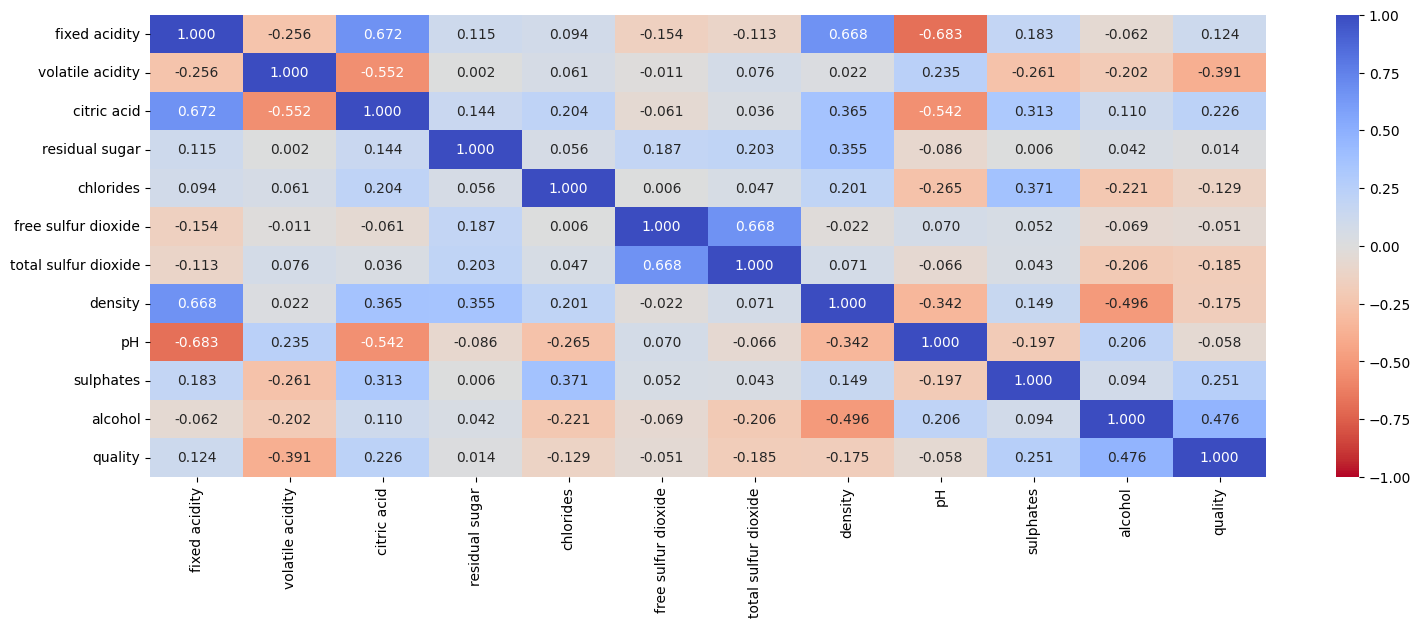

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,6))
corr = redwine.corr()
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap = 'coolwarm_r')

In [152]:
import numpy as np
mask = np.tril(np.ones_like(corr)) # 대각선 포함하여 아래가 1
mask = np.tril(np.ones_like(corr), k = -1) # 대각선 제외하고 아래가 1
mask = np.triu(np.ones_like(corr)) # 대각선 포함하여 위가 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

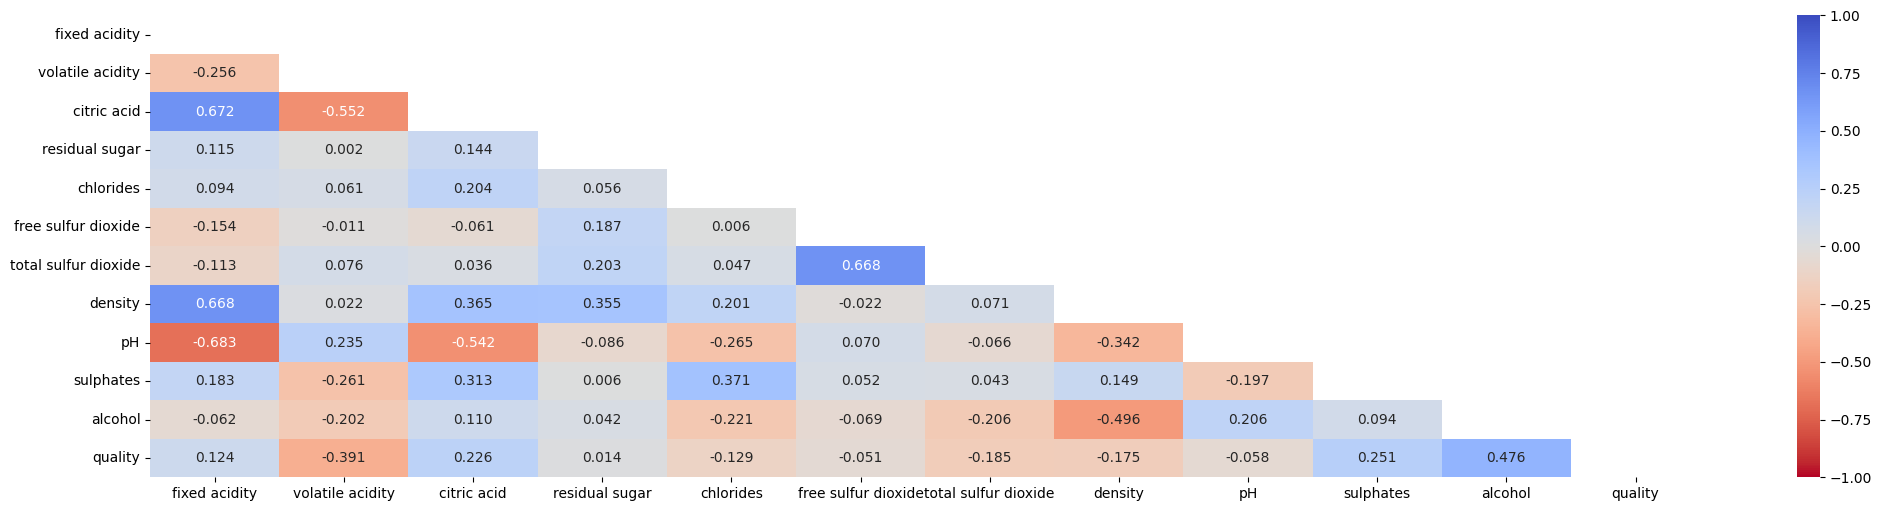

In [38]:
import seaborn as sns
plt.figure(figsize=(25,6))
corr = redwine.corr()
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap = 'coolwarm_r', mask=mask)
plt.show()

## 1~4 분류모형의 Feature Importance
- 분류모형의 feature_importance_ 속성 : 각 독립변수들이 종속변수에 영향을 주는 정도
- DecisionTreeClassifier, RandomForestClassifer, GradientBoostingClassifier(tree계열)
- LogisticRegression, SVC< MLPclassifier등은

In [57]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]#.values # numpy 배열로
y = redwine.iloc[:, -1]#.to_numpy()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)
train_X.shape, test_X.shape, train_y.shape, test_y.shape, type(train_X)

((1119, 11), (480, 11), (1119,), (480,), pandas.core.frame.DataFrame)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, # 트리의 갯수 10
                                 random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [59]:
rf_model.score(test_X, test_y) #accuracy

0.6541666666666667

In [60]:
rf_model.feature_importances_ # 종속변수에 영향을 주는 정도

array([0.07200223, 0.08422528, 0.08258906, 0.07717586, 0.0766737 ,
       0.07026724, 0.10355332, 0.08435171, 0.08915544, 0.10904774,
       0.15095841])

In [62]:
features = pd.DataFrame(np.c_[X.columns, rf_model.feature_importances_],
                        columns=['feature', 'importance'])
features['importance'].sum()

1.0

In [65]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.150958
1,sulphates,0.109048
2,total sulfur dioxide,0.103553
3,pH,0.089155
4,density,0.084352
5,volatile acidity,0.084225
6,citric acid,0.082589
7,residual sugar,0.077176
8,chlorides,0.076674
9,fixed acidity,0.072002


### feature_importances_를 이용한 변수 중요도 시각화

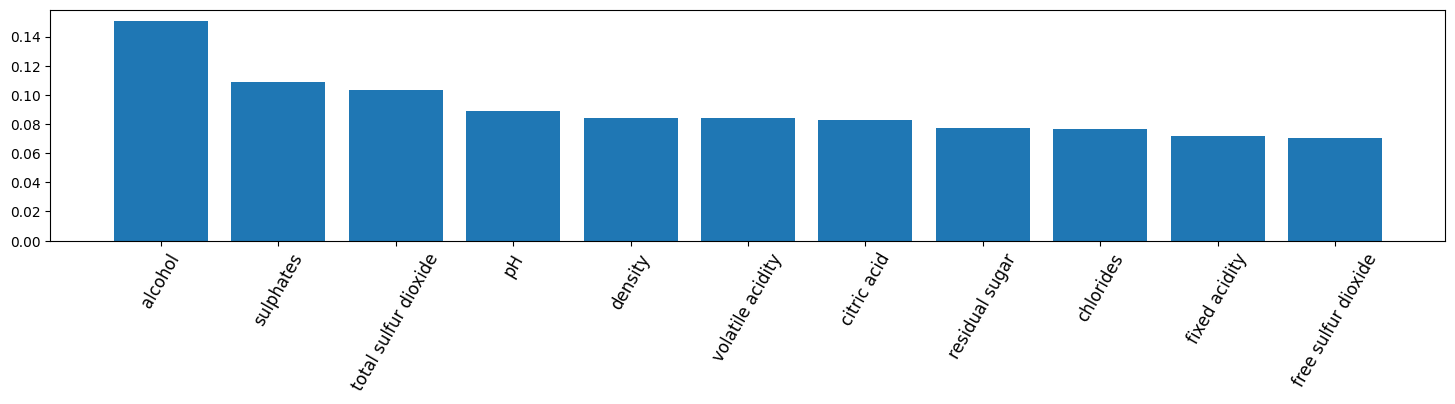

In [67]:
# features를 시각화
plt.figure(figsize=(18,3))
plt.bar(features.feature, features.importance)
plt.xticks(fontsize=12, rotation = 60)
plt.show()


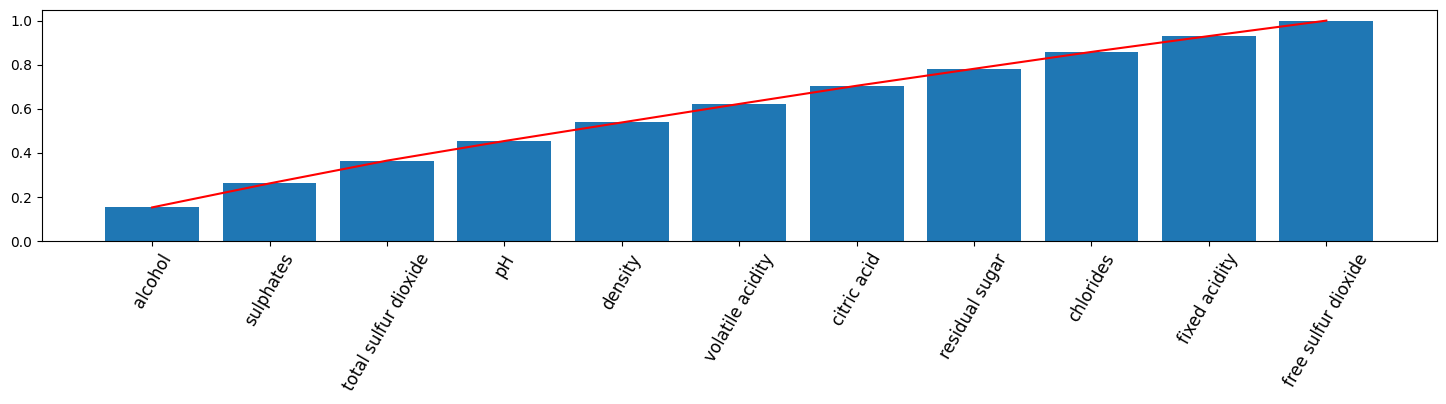

In [71]:
# 누적합을 이용한 시각화

y_stack = np.cumsum(features.importance)
plt.figure(figsize=(18,3))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red')
plt.xticks(fontsize=12, rotation = 60)
plt.show()


### RFE(Recursive Feature Elimination) 방식
- RFE를 이용하면 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 나가면서 최종적으로 선택한 변수를 찾는다

In [72]:
from sklearn.feature_selection import RFE
rfe_model = RFE(#RandomForestClassifier(n_estimators=10,random_state=10)
                rf_model,
                n_features_to_select=5
)
rfe_model.fit(train_X, train_y)
rfe_model.get_support() # 선택된 변수(True)인지 제거된 변수(False)인지 여부


array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [76]:
feature_rfe = pd.DataFrame(np.c_[X.columns, rfe_model.get_support()],
                          columns=['feature', 'selected'])
feature_rfe[feature_rfe.selected==True]

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 특징변수 선택

In [83]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# f_classif : ANNOVA F검정 - 독립변수가 연속형(그룹간 차이가 유의미한지)
# chi2      : 카이제곱통계량 검정 - 독립변수가 범주형(타겟변수도 범주형) 또는 양의 실수
X,y = load_iris(return_X_y=True, as_frame=False)
X.shape, y.shape
X_new = SelectKBest(f_classif, k=1).fit_transform(X, y)

In [86]:
X_new[:3] # petal_length

array([[1.4],
       [1.4],
       [1.3]])

In [87]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# 2절. 파라미터 탐색
- 하이퍼파라미터(모델의 성능에 여향을 미칠 수 있는 사용자가 직접 설정하는 파라미터)
- 어떤 파라미터를 사용하는게 최적의 결과를 낼지 탐색
- sklearn패키지의 하이퍼 파라미터 튜닝 도구
    * validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    * GridSearchCV : 복수 하이퍼파라미터 최적화 클래스
## 2-1 validation_curve
    -모형, x, y, param_name(파라미터이름), param_range(파라미터값list), 교차검증, scoring기준

In [158]:
# 데이터 
from sklearn.datasets import load_digits
digits = load_digits()

# digits.data 1797x64 크기의 배열
# digits.data 1797x64 크기의 배열 (0~9중 하나)
# digits.images.shape 1797x8x8 크기의 배열 (이밎 형태)

X, y = digits.data, digits.target
X.shape, y.shape




((1797, 64), (1797,))

In [93]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

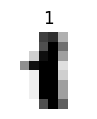

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(X[1].reshape(8,8), cmap='gray_r')
plt.axis('off')
plt.title(y[1])
plt.show()

In [104]:
from sklearn.svm import SVC
model = SVC(probability=True).fit(X, y) # 기본 파라미터로 모형 생성

In [116]:
test_x = X[1000].reshape(1, -1)

print('예측 :', model.predict(test_x), ', 실제:', y[1000])

예측 : [1] , 실제: 1


In [117]:
prob = model.predict_proba(test_x)[0]
classes = model.classes_

print('확률 :',classes)
print('확률 :',prob)

for c,p in zip(classes, prob):
    print("{}일 확률 : {:.3f}%".format(c, p*100) )


확률 : [0 1 2 3 4 5 6 7 8 9]
확률 : [0.00153469 0.95247522 0.01527318 0.01114152 0.00292702 0.00219898
 0.00441798 0.00181354 0.0055823  0.00263555]
0일 확률 : 0.153%
1일 확률 : 95.248%
2일 확률 : 1.527%
3일 확률 : 1.114%
4일 확률 : 0.293%
5일 확률 : 0.220%
6일 확률 : 0.442%
7일 확률 : 0.181%
8일 확률 : 0.558%
9일 확률 : 0.264%


In [118]:
# 파라미터 탐색 score (accuracy)
model.score(X, y)

0.996661101836394

In [121]:
# SVC() 모형의 최적의 gamma값 탐색
import numpy as np
param_range = np.logspace(-6, -1, 10) # gamma값의 후보군
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [125]:
%%time
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
                        SVC(), # 예측모형
                        X, y,
                        param_name="gamma", # gamma가 크면 결정경제가 복잡. overfitting
                        param_range=param_range,
                        cv=10, # 교차검증
                        scoring="accuracy", #balanced_accuracy(불균형을고려한정확도)
                        n_jobs = -1 # 모든 코어
                        
)
                                

CPU times: total: 344 ms
Wall time: 10.3 s


In [126]:
test_scores

array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.29608939, 0.19553073, 0.19553073],
       [0.67777778, 0.74444444, 0.7       , 0.66666667, 0.73333333,
        0.67222222, 0.72222222, 0.70949721, 0.67597765, 0.73743017],
       [0.87777778, 0.95      , 0.90555556, 0.86666667, 0.92222222,
        0.91666667, 0.96666667, 0.93854749, 0.83240223, 0.91061453],
       [0.92222222, 0.96666667, 0.95      , 0.91111111, 0.95      ,
        0.98333333, 0.97777778, 0.96648045, 0.87709497, 0.92178771],
       [0.93888889, 0.97222222, 0.93333333, 0.95      , 0.97222222,
        0.98888889, 0.98333333, 0.99441341, 0.91061453, 0.94413408],
       [0.95555556, 1.        , 0.93333333, 0.96666667, 0.98888889,
        0.98888889, 0.99444444, 0.99441341, 0.96089385, 0.96648045],
       [0.93333333, 0.98888889, 0.95555556, 0.96666667, 0.98333333,
        0.98888889, 0.99444444, 0.99441341, 0.97765363, 0.96648045],
       [0.77777778, 0.89444444, 0.7611111

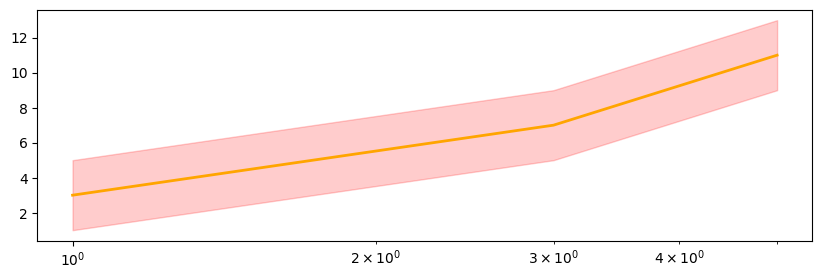

In [131]:
x = np.array([1,3,5]) # 10의1승, 10의3승, 10의5승
y = np.array([3,7,11]) # 3,7,11
plt.figure(figsize=(10,3))
plt.semilogx(x, y , color='orange', lw=2)
plt.fill_between(x, y-2, y+2, color='red', alpha=0.2)

In [139]:
train_scores_mean = np.mean(train_scores, axis=1) # train 평균
train_scores_std = np.std(train_scores, axis=1) # train 표준편차
test_scores_mean = test_scores.mean(axis=1) #test평균
test_scores_std  = test_scores.std(axis=1) #test 표준편차

In [140]:
train_scores_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [141]:
train_scores

array([[0.10204082, 0.10204082, 0.10204082, 0.10204082, 0.10204082,
        0.10204082, 0.10204082, 0.28615575, 0.19159456, 0.19159456],
       [0.71923315, 0.70995671, 0.72108844, 0.716141  , 0.71552257,
        0.71243043, 0.70810142, 0.72435105, 0.73918418, 0.73856613],
       [0.93753865, 0.93444651, 0.93320965, 0.93135436, 0.93692022,
        0.92888064, 0.93382808, 0.93201483, 0.94313968, 0.93263288],
       [0.96846011, 0.96969697, 0.96722325, 0.97217069, 0.96846011,
        0.96722325, 0.96846011, 0.96538937, 0.97342398, 0.97342398],
       [0.98824985, 0.98577613, 0.9894867 , 0.98763142, 0.98639456,
        0.98824985, 0.98824985, 0.98702101, 0.98825711, 0.98825711],
       [0.99814471, 0.99690785, 0.99814471, 0.99752628, 0.99690785,
        0.99814471, 0.99814471, 0.99814586, 0.99814586, 0.99876391],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

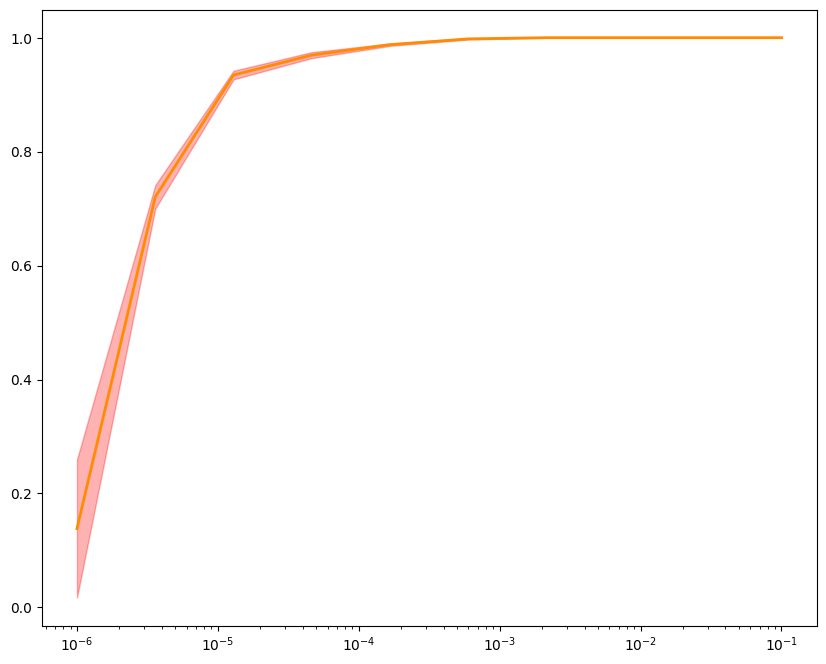

In [156]:
plt.figure(figsize=(10,8))
plt.semilogx(param_range, train_scores_mean, color='darkorange', lw=2)
plt.fill_between(param_range,
                train_scores_mean-train_scores_std*2,
                train_scores_mean+train_scores_std*2,
                alpha=0.3, color ='red')




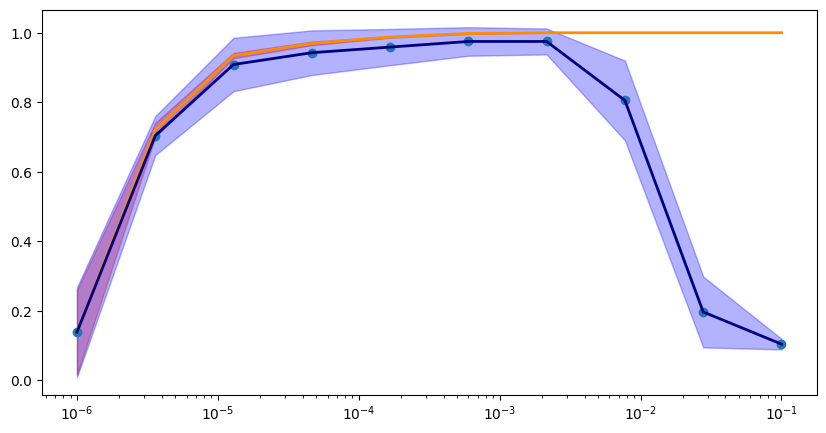

In [157]:
plt.figure(figsize=(10, 5))
plt.semilogx(param_range, train_scores_mean, color='darkorange', lw=2)
plt.fill_between(param_range,
                train_scores_mean-train_scores_std*2,
                train_scores_mean+train_scores_std*2,
                alpha=0.3, color='red')
plt.semilogx(param_range, test_scores_mean, color='navy', lw=2)
plt.fill_between(param_range,
                test_scores_mean-test_scores_std*2,
                test_scores_mean+test_scores_std*2,
                alpha=0.3, color='blue')
plt.scatter(param_range, test_scores_mean)
plt.show()

In [149]:
test_scores_mean.argmax()

6

In [155]:
# 최적의 gamma
gamma = param_range[test_scores_mean.argmax()]

gamma

0.0021544346900318843

In [159]:
model = SVC(gamma=gamma).fit(X,y)

In [160]:
model.score(X,y)

1.0

## 2-2 GridSearchCV
- 복수 하이퍼파라미터 최적화 클래스
- 모형 클래스를 가지고 있음
- fit()/predict()/score()/predict_proba()/predict_log_proba()




In [161]:
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape



((1599, 11), (1599,))

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

In [173]:
%%time
# 가장 평가 점수가 높은 독립변수 ?개 선택, SVC()모형의 최적의 C=?
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개를 찾음
svc = SVC(kernel='linear') # 직선으로 나누는 가장 단순한 decision_function
pipeline = Pipeline([('select', selection),('svc', svc)])
param_grid = dict(select__k = [5,6,7,8,9,10,11],
                 svc__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline,
                          param_grid=param_grid, # 파라미터들
                          cv=2, # 교차검증 k-fold cross validation
                          verbose=2,
                          n_jobs=-1)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
CPU times: total: 13.3 s
Wall time: 1min 35s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [174]:
print(grid_search.best_estimator_) # 가장 높은 점수를 낸 파라미터 모형

Pipeline(steps=[('select', SelectKBest(k=9)),
                ('svc', SVC(C=1, kernel='linear'))])


In [175]:
print(grid_search.best_params_) # 최적의 파라미터 정보

{'select__k': 9, 'svc__C': 1}


In [177]:
model = grid_search.best_estimator_
model.predict(redwine_X)

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [179]:
# 최적의 k값과 C값의 model
model.score(redwine_X, redwine_y)

0.5872420262664165

In [181]:
# 기본 SVC model
model = SVC().fit(redwine_X, redwine_y)
model.score(redwine_X, redwine_y)

0.5103189493433395

# 3절 자료 불균형 처리
- 단순 오버/언더 샘플링
- 단, 단순 오버샘플시 소스의 데이터를 복사하면 그 데이터들에 의해 과적합 생길 수 있음
- SMOTe 라이브러리를 이용한 오버샘플링
## 3-1 SMOTE를 이용한 오버샘플링

In [206]:
# 데이터 (99%:1%)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, # 표본 수
                          n_features=10, # 독립변수 갯수
                          n_informative=5, # 종속변수에 영향을 주는 갯수
                          n_redundant=0,
                          n_clusters_per_class=1, # 클래스당 서브 클러스터 수 
                          n_classes=2,
                          weights=[0.99, 0.01], # 각 클래스의 할당된 표본 확률
                          random_state=42)
X.shape, y.shape, y.sum()

((10000, 10), (10000,), 140)

In [207]:
# train-test 셋 분리 => SMOTE(train데이터) => 모델 fit(train데이터) => score(test데이터)
# train-test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((7000, 10), (7000,), (3000, 10), (3000,))

In [208]:
print(y_train.mean()) # 1이 1.4%
pd.Series(y_train).value_counts()

0.014


0    6902
1      98
dtype: int64

In [209]:
# SMOTE(train데이터)
# pip install imbalanced-Learn==0.10.1
from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy = {0:6902, 1:600})
sm = SMOTE()
X_resawmpled, y_resampled = sm.fit_resample(X_train, y_train)

In [210]:
pd.Series(y_resampled).value_counts()

0    6902
1    6902
dtype: int64

## 3-2 가중치 제어 모형
- 자료 불균형 처리의 또 다른 방법
- 모델에 데이터 따른 가중치 부여 방법

In [212]:
from sklearn.datasets import make_classification
rf_model = RandomForestClassifier(n_estimators=100,
                                 class_weight={0:1, 1:1.5}, # 가중치 부여
                                 random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)

# 4절. 앙상블 모형
- 목적 : 여러개 분류 모델을 하나의 통합 분류모델로 연결하여 개별 분류모델보다 더 좋은
성능 달성
- 방법 :
    배깅(bagging) : 분류를 잘하는 모델에 가중치 (병렬작업) ex.RandomForest
    부스팅(boosting) : 분류가 안된 데이터에 가중치(순차작업) ex. XGBoost, LGBM, AdaBoost- 불균형데이터
    투표(Voting) : 여러개 모델의 다수결 투표

cf. 배깅 알고리즘시 0.632규칙 : 복원추출시 63.2% 추출


In [217]:
np.random.choice(10, 10, replace=True) # 복원추출로 10미만의 수를 10개 추출

array([3, 8, 4, 6, 4, 1, 3, 8, 1, 8])

In [218]:
# 10미만의 수 10개 복원추출할 경우 뽑히는 수의 갯수
len(set(np.random.choice(10, 10, replace=True)))

6

In [220]:
# 1000미만의 수 1000개 복원추출할 경우 뽑히는 수의 갯수
len(set(np.random.choice(1000, 1000, replace=True)))

625

In [227]:
# n미만의 수 n개 복추출할 경우의 데이터 페센트
n = 1000000
len(set(np.random.choice(n, n, replace=True)))/n

0.632169

In [228]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          n_classes=2,
                          weights=[0.9, 0.1],
                          random_state=42)

In [229]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((12556, 10), (12556,))

In [230]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y, 
                  test_X=test_X, test_y=test_y):
    model.fit(train_X, train_y)
    accuracy = model.score(test_X, test_y)
    hat_y = model.predict(test_X)
    precision = precision_score(test_y, hat_y)
    recall    = recall_score(test_y, hat_y)
    f1 = f1_score(test_y, hat_y)
    print(f"정확도 :{accuracy:.4f}, precision:{precision:.4f}, recall:{recall:.4f}, f1:{f1:.4f}")

## 4-1 배깅
- RandomForestClassifier, BaggingClassifier

In [231]:
# 배깅
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model_measure(model)

정확도 :0.9813, precision:0.9259, recall:0.8900, f1:0.9076


In [232]:
from sklearn.ensemble import BaggingClassifier
model_measure(BaggingClassifier(n_estimators=500, bootstrap=True)) # 복원추출

정확도 :0.9760, precision:0.8786, recall:0.8900, f1:0.8842


## 4.2 부스팅
- AdaBoost, XGB, LightGBM, CatBoost

In [241]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [242]:
model_measure(AdaBoostClassifier())

정확도 :0.9627, precision:0.7669, recall:0.9159, f1:0.8348


In [243]:
model_measure(XGBClassifier())

정확도 :0.9873, precision:0.9656, recall:0.9094, f1:0.9367


In [244]:
model_measure(LGBMClassifier(force_col_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
정확도 :0.9857, precision:0.9493, recall:0.9094, f1:0.9289


In [245]:
model_measure(CatBoostClassifier())

Learning rate set to 0.030349
0:	learn: 0.6481213	total: 147ms	remaining: 2m 26s
1:	learn: 0.6045878	total: 158ms	remaining: 1m 19s
2:	learn: 0.5669369	total: 165ms	remaining: 54.8s
3:	learn: 0.5353491	total: 171ms	remaining: 42.7s
4:	learn: 0.5066405	total: 178ms	remaining: 35.3s
5:	learn: 0.4729602	total: 184ms	remaining: 30.5s
6:	learn: 0.4443127	total: 193ms	remaining: 27.4s
7:	learn: 0.4222951	total: 199ms	remaining: 24.7s
8:	learn: 0.4025180	total: 206ms	remaining: 22.7s
9:	learn: 0.3853673	total: 213ms	remaining: 21.1s
10:	learn: 0.3670920	total: 224ms	remaining: 20.1s
11:	learn: 0.3505814	total: 231ms	remaining: 19s
12:	learn: 0.3331393	total: 237ms	remaining: 18s
13:	learn: 0.3190458	total: 243ms	remaining: 17.1s
14:	learn: 0.3066617	total: 250ms	remaining: 16.4s
15:	learn: 0.2934717	total: 258ms	remaining: 15.9s
16:	learn: 0.2832725	total: 264ms	remaining: 15.3s
17:	learn: 0.2704818	total: 270ms	remaining: 14.7s
18:	learn: 0.2611018	total: 276ms	remaining: 14.3s
19:	learn: 0.

164:	learn: 0.0630211	total: 1.43s	remaining: 7.22s
165:	learn: 0.0628690	total: 1.44s	remaining: 7.21s
166:	learn: 0.0626662	total: 1.44s	remaining: 7.2s
167:	learn: 0.0624954	total: 1.45s	remaining: 7.18s
168:	learn: 0.0623199	total: 1.46s	remaining: 7.17s
169:	learn: 0.0621769	total: 1.47s	remaining: 7.16s
170:	learn: 0.0619838	total: 1.48s	remaining: 7.15s
171:	learn: 0.0618728	total: 1.48s	remaining: 7.13s
172:	learn: 0.0616912	total: 1.49s	remaining: 7.11s
173:	learn: 0.0614526	total: 1.5s	remaining: 7.1s
174:	learn: 0.0612734	total: 1.5s	remaining: 7.1s
175:	learn: 0.0610945	total: 1.51s	remaining: 7.08s
176:	learn: 0.0608619	total: 1.52s	remaining: 7.06s
177:	learn: 0.0606535	total: 1.52s	remaining: 7.04s
178:	learn: 0.0604516	total: 1.53s	remaining: 7.04s
179:	learn: 0.0602664	total: 1.54s	remaining: 7.02s
180:	learn: 0.0600654	total: 1.55s	remaining: 7s
181:	learn: 0.0597502	total: 1.55s	remaining: 6.98s
182:	learn: 0.0595694	total: 1.56s	remaining: 6.96s
183:	learn: 0.059253

328:	learn: 0.0374202	total: 2.62s	remaining: 5.34s
329:	learn: 0.0372695	total: 2.63s	remaining: 5.33s
330:	learn: 0.0371763	total: 2.63s	remaining: 5.33s
331:	learn: 0.0370897	total: 2.64s	remaining: 5.32s
332:	learn: 0.0369880	total: 2.65s	remaining: 5.3s
333:	learn: 0.0369070	total: 2.65s	remaining: 5.29s
334:	learn: 0.0367840	total: 2.66s	remaining: 5.28s
335:	learn: 0.0367211	total: 2.67s	remaining: 5.27s
336:	learn: 0.0366238	total: 2.67s	remaining: 5.26s
337:	learn: 0.0365425	total: 2.68s	remaining: 5.25s
338:	learn: 0.0364527	total: 2.69s	remaining: 5.24s
339:	learn: 0.0363376	total: 2.7s	remaining: 5.24s
340:	learn: 0.0362335	total: 2.71s	remaining: 5.23s
341:	learn: 0.0361589	total: 2.71s	remaining: 5.22s
342:	learn: 0.0360678	total: 2.72s	remaining: 5.21s
343:	learn: 0.0359965	total: 2.73s	remaining: 5.2s
344:	learn: 0.0358907	total: 2.74s	remaining: 5.19s
345:	learn: 0.0357745	total: 2.74s	remaining: 5.19s
346:	learn: 0.0356618	total: 2.75s	remaining: 5.18s
347:	learn: 0.0

493:	learn: 0.0234740	total: 3.85s	remaining: 3.94s
494:	learn: 0.0234278	total: 3.85s	remaining: 3.93s
495:	learn: 0.0233243	total: 3.86s	remaining: 3.92s
496:	learn: 0.0232612	total: 3.87s	remaining: 3.92s
497:	learn: 0.0231929	total: 3.88s	remaining: 3.91s
498:	learn: 0.0231483	total: 3.88s	remaining: 3.9s
499:	learn: 0.0230866	total: 3.89s	remaining: 3.89s
500:	learn: 0.0230255	total: 3.9s	remaining: 3.88s
501:	learn: 0.0229768	total: 3.91s	remaining: 3.88s
502:	learn: 0.0229107	total: 3.92s	remaining: 3.87s
503:	learn: 0.0228761	total: 3.92s	remaining: 3.86s
504:	learn: 0.0228611	total: 3.93s	remaining: 3.85s
505:	learn: 0.0227915	total: 3.94s	remaining: 3.85s
506:	learn: 0.0227511	total: 3.95s	remaining: 3.84s
507:	learn: 0.0227228	total: 3.96s	remaining: 3.83s
508:	learn: 0.0226787	total: 3.96s	remaining: 3.82s
509:	learn: 0.0226061	total: 3.97s	remaining: 3.82s
510:	learn: 0.0225445	total: 3.98s	remaining: 3.81s
511:	learn: 0.0224793	total: 3.98s	remaining: 3.8s
512:	learn: 0.0

663:	learn: 0.0159458	total: 5.08s	remaining: 2.57s
664:	learn: 0.0159026	total: 5.08s	remaining: 2.56s
665:	learn: 0.0158766	total: 5.09s	remaining: 2.55s
666:	learn: 0.0158086	total: 5.1s	remaining: 2.55s
667:	learn: 0.0157977	total: 5.11s	remaining: 2.54s
668:	learn: 0.0157571	total: 5.11s	remaining: 2.53s
669:	learn: 0.0157160	total: 5.12s	remaining: 2.52s
670:	learn: 0.0156840	total: 5.13s	remaining: 2.51s
671:	learn: 0.0156153	total: 5.13s	remaining: 2.51s
672:	learn: 0.0156079	total: 5.14s	remaining: 2.5s
673:	learn: 0.0155513	total: 5.15s	remaining: 2.49s
674:	learn: 0.0155245	total: 5.16s	remaining: 2.48s
675:	learn: 0.0155175	total: 5.16s	remaining: 2.48s
676:	learn: 0.0154883	total: 5.17s	remaining: 2.47s
677:	learn: 0.0154575	total: 5.18s	remaining: 2.46s
678:	learn: 0.0154420	total: 5.19s	remaining: 2.45s
679:	learn: 0.0154065	total: 5.2s	remaining: 2.44s
680:	learn: 0.0153764	total: 5.2s	remaining: 2.44s
681:	learn: 0.0153644	total: 5.21s	remaining: 2.43s
682:	learn: 0.01

840:	learn: 0.0113344	total: 6.32s	remaining: 1.19s
841:	learn: 0.0112948	total: 6.33s	remaining: 1.19s
842:	learn: 0.0112877	total: 6.33s	remaining: 1.18s
843:	learn: 0.0112593	total: 6.34s	remaining: 1.17s
844:	learn: 0.0112321	total: 6.35s	remaining: 1.16s
845:	learn: 0.0112024	total: 6.36s	remaining: 1.16s
846:	learn: 0.0111734	total: 6.36s	remaining: 1.15s
847:	learn: 0.0111271	total: 6.37s	remaining: 1.14s
848:	learn: 0.0111160	total: 6.38s	remaining: 1.13s
849:	learn: 0.0111065	total: 6.38s	remaining: 1.13s
850:	learn: 0.0110800	total: 6.39s	remaining: 1.12s
851:	learn: 0.0110504	total: 6.4s	remaining: 1.11s
852:	learn: 0.0110340	total: 6.41s	remaining: 1.1s
853:	learn: 0.0110289	total: 6.41s	remaining: 1.1s
854:	learn: 0.0110000	total: 6.42s	remaining: 1.09s
855:	learn: 0.0109943	total: 6.42s	remaining: 1.08s
856:	learn: 0.0109859	total: 6.43s	remaining: 1.07s
857:	learn: 0.0109536	total: 6.44s	remaining: 1.06s
858:	learn: 0.0109266	total: 6.45s	remaining: 1.06s
859:	learn: 0.0